In [4623]:
import pandas as pd, numpy as np,seaborn as sns, matplotlib.pyplot as plt,warnings
warnings.filterwarnings("ignore")

In [4624]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4625]:
house = pd.read_csv(r'/content/drive/MyDrive/hackothon/house_pred/Data Set/TRAINING_.csv',header = 0,index_col=0 )

In [4626]:
test = pd.read_csv(r'/content/drive/MyDrive/hackothon/house_pred/Data Set/TEST_.csv',header = 0,index_col=0 )

In [4627]:
house.shape

(7000, 13)

In [4628]:
house.isnull().sum()

Area(total)       0
Troom             2
Nbedrooms         3
Nbwashrooms       2
Twashrooms        1
roof           1353
Roof(Area)     1353
Lawn(Area)        2
Nfloors           0
API               1
ANB               0
Grade             0
EXPECTED          0
dtype: int64

In [4629]:
house.roof.replace({"no":"NO","yes":"YES"},inplace=True)

In [4630]:
house.roof.value_counts()
#house.isnull().sum()

NO     2855
YES    2792
Name: roof, dtype: int64

In [4631]:
# house["Roof(Area)"].value_counts()

In [4632]:
# house = house[house["Roof(Area)"] != 0.0]

In [4633]:
house["Roof(Area)"].unique()

array([  0.,  97.,  nan, 112.,  83.,  72.,  92.,  77.,  94., 108., 102.,
       106.,  95.,  80., 118.,  74.,  78.,  85.,  98., 109., 113.,  84.,
       101., 100., 119.,  75., 103.,  71.,  88., 120., 114.,  82.,  96.,
        91., 105., 111.,  76.,  90.,  81., 107., 115.,  86.,  87., 110.,
        73., 104.,  89.,  93., 116., 117.,  79.,  99.])

In [4634]:
house.isnull().sum()

Area(total)       0
Troom             2
Nbedrooms         3
Nbwashrooms       2
Twashrooms        1
roof           1353
Roof(Area)     1353
Lawn(Area)        2
Nfloors           0
API               1
ANB               0
Grade             0
EXPECTED          0
dtype: int64

In [4635]:
house["Roof(Area)"].isnull().sum()

1353

In [4636]:
house["Roof(Area)"].mean()

47.20276252877634

#Change

In [4637]:
house["Roof(Area)"].fillna(100, inplace = True)

In [4638]:
house["Roof(Area)"].replace(100, 93.20276252877634, inplace = True)
# house["Roof(Area)"].replace(47, 93.0547143, inplace = True)

In [4639]:
house["Roof(Area)"].value_counts()

0.000000      2855
93.202763     1398
111.000000      68
88.000000       65
95.000000       64
84.000000       64
80.000000       63
112.000000      63
90.000000       62
114.000000      62
117.000000      61
94.000000       61
107.000000      61
82.000000       61
71.000000       61
79.000000       60
98.000000       60
72.000000       60
101.000000      59
118.000000      59
78.000000       59
93.000000       58
99.000000       58
106.000000      58
73.000000       57
119.000000      56
97.000000       56
120.000000      56
108.000000      56
89.000000       56
109.000000      55
104.000000      55
75.000000       54
105.000000      54
91.000000       53
87.000000       53
113.000000      53
102.000000      52
74.000000       52
77.000000       52
86.000000       52
81.000000       51
115.000000      51
76.000000       51
96.000000       51
110.000000      50
103.000000      49
85.000000       48
92.000000       47
83.000000       42
116.000000      38
Name: Roof(Area), dtype: int64

In [4640]:
house.isnull().sum()

Area(total)       0
Troom             2
Nbedrooms         3
Nbwashrooms       2
Twashrooms        1
roof           1353
Roof(Area)        0
Lawn(Area)        2
Nfloors           0
API               1
ANB               0
Grade             0
EXPECTED          0
dtype: int64

In [4641]:
"""# List of columns to consider for removing missing values
columns_with_missing = [ 'roof']

# Remove rows with missing values in the specified columns
house.dropna(subset=columns_with_missing, inplace=True)"""

house.drop(columns=['roof'], inplace=True) #'roof', 'Nbwashrooms','Nfloors', 'Twashrooms'


In [4642]:
col=[]
for x in house.columns:
  if house[x].dtypes == "object":
    col.append(x)

In [4643]:
col

['Grade', 'EXPECTED']

In [4644]:
house["Roof(Area)"].mean()

56.050208859318474

In [4645]:
house['Roof(Area)'].isnull().sum()

0

In [4646]:
# house['Roof(Area)'].fillna(96, inplace=True)

In [4647]:
# house['Roof(Area)'].value_counts()

In [4648]:
house.isnull().sum()

Area(total)    0
Troom          2
Nbedrooms      3
Nbwashrooms    2
Twashrooms     1
Roof(Area)     0
Lawn(Area)     2
Nfloors        0
API            1
ANB            0
Grade          0
EXPECTED       0
dtype: int64

In [4649]:
for x in house.columns:
    if house[x].dtype=="object" or house[x].dtype=="bool":
        house[x].fillna(house[x].mode()[0], inplace=True)
    elif house[x].dtype=="int64" or house[x].dtype=="float64":
        house[x].fillna(round(house[x].mean()), inplace=True)

In [4650]:
# house.dropna(inplace=True)

In [4651]:
house.isnull().sum()

Area(total)    0
Troom          0
Nbedrooms      0
Nbwashrooms    0
Twashrooms     0
Roof(Area)     0
Lawn(Area)     0
Nfloors        0
API            0
ANB            0
Grade          0
EXPECTED       0
dtype: int64

In [4652]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in col:
    house[x]=le.fit_transform(house[x])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Feature', x)
    print('mapping', le_name_mapping)

Feature Grade
mapping {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4}
Feature EXPECTED
mapping {'2717$': 0, '2743$': 1, '2786$': 2, '2801$': 3, '2802$': 4, '2808$': 5, '2834$': 6, '2839$': 7, '2846$': 8, '2849$': 9, '2860$': 10, '2869$': 11, '2882$': 12, '2885$': 13, '2904$': 14, '2905$': 15, '2908$': 16, '2913$': 17, '2923$': 18, '2927$': 19, '2939$': 20, '2940$': 21, '2941$': 22, '2944$': 23, '2960$': 24, '2964$': 25, '2972$': 26, '2976$': 27, '2978$': 28, '2979$': 29, '2981$': 30, '2983$': 31, '2990$': 32, '2994$': 33, '2995$': 34, '2996$': 35, '3005$': 36, '3006$': 37, '3007$': 38, '3011$': 39, '3012$': 40, '3015$': 41, '3017$': 42, '3019$': 43, '3020$': 44, '3021$': 45, '3022$': 46, '3023$': 47, '3029$': 48, '3030$': 49, '3031$': 50, '3033$': 51, '3040$': 52, '3041$': 53, '3042$': 54, '3046$': 55, '3048$': 56, '3049$': 57, '3050$': 58, '3051$': 59, '3053$': 60, '3054$': 61, '3055$': 62, '3060$': 63, '3061$': 64, '3063$': 65, '3064$': 66, '3065$': 67, '3066$': 68, '3067$': 69, '3068$': 70

In [4653]:
cols = house.columns.tolist()
cols = cols[:-2] + [cols[-1]] + [cols[-2]]
house = house[cols]

In [4654]:
house.isnull().sum()

Area(total)    0
Troom          0
Nbedrooms      0
Nbwashrooms    0
Twashrooms     0
Roof(Area)     0
Lawn(Area)     0
Nfloors        0
API            0
ANB            0
EXPECTED       0
Grade          0
dtype: int64

# Spliting X and Y

In [4655]:
house.columns

Index(['Area(total)', 'Troom', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms',
       'Roof(Area)', 'Lawn(Area)', 'Nfloors', 'API', 'ANB', 'EXPECTED',
       'Grade'],
      dtype='object')

In [4656]:
X = house.values[:,:-1]
Y = house.values[:,-1]

In [4657]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.22,random_state = 45)

#Standard Scaler

In [4658]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [4659]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = house.columns[:-1])
X_test_scaled = pd.DataFrame(X_test_scaled, columns = house.columns[:-1])

In [4660]:
x_train = X_train_scaled
x_test = X_test_scaled

In [4661]:
# x_train

In [4662]:
# x_test

#Feature Selection

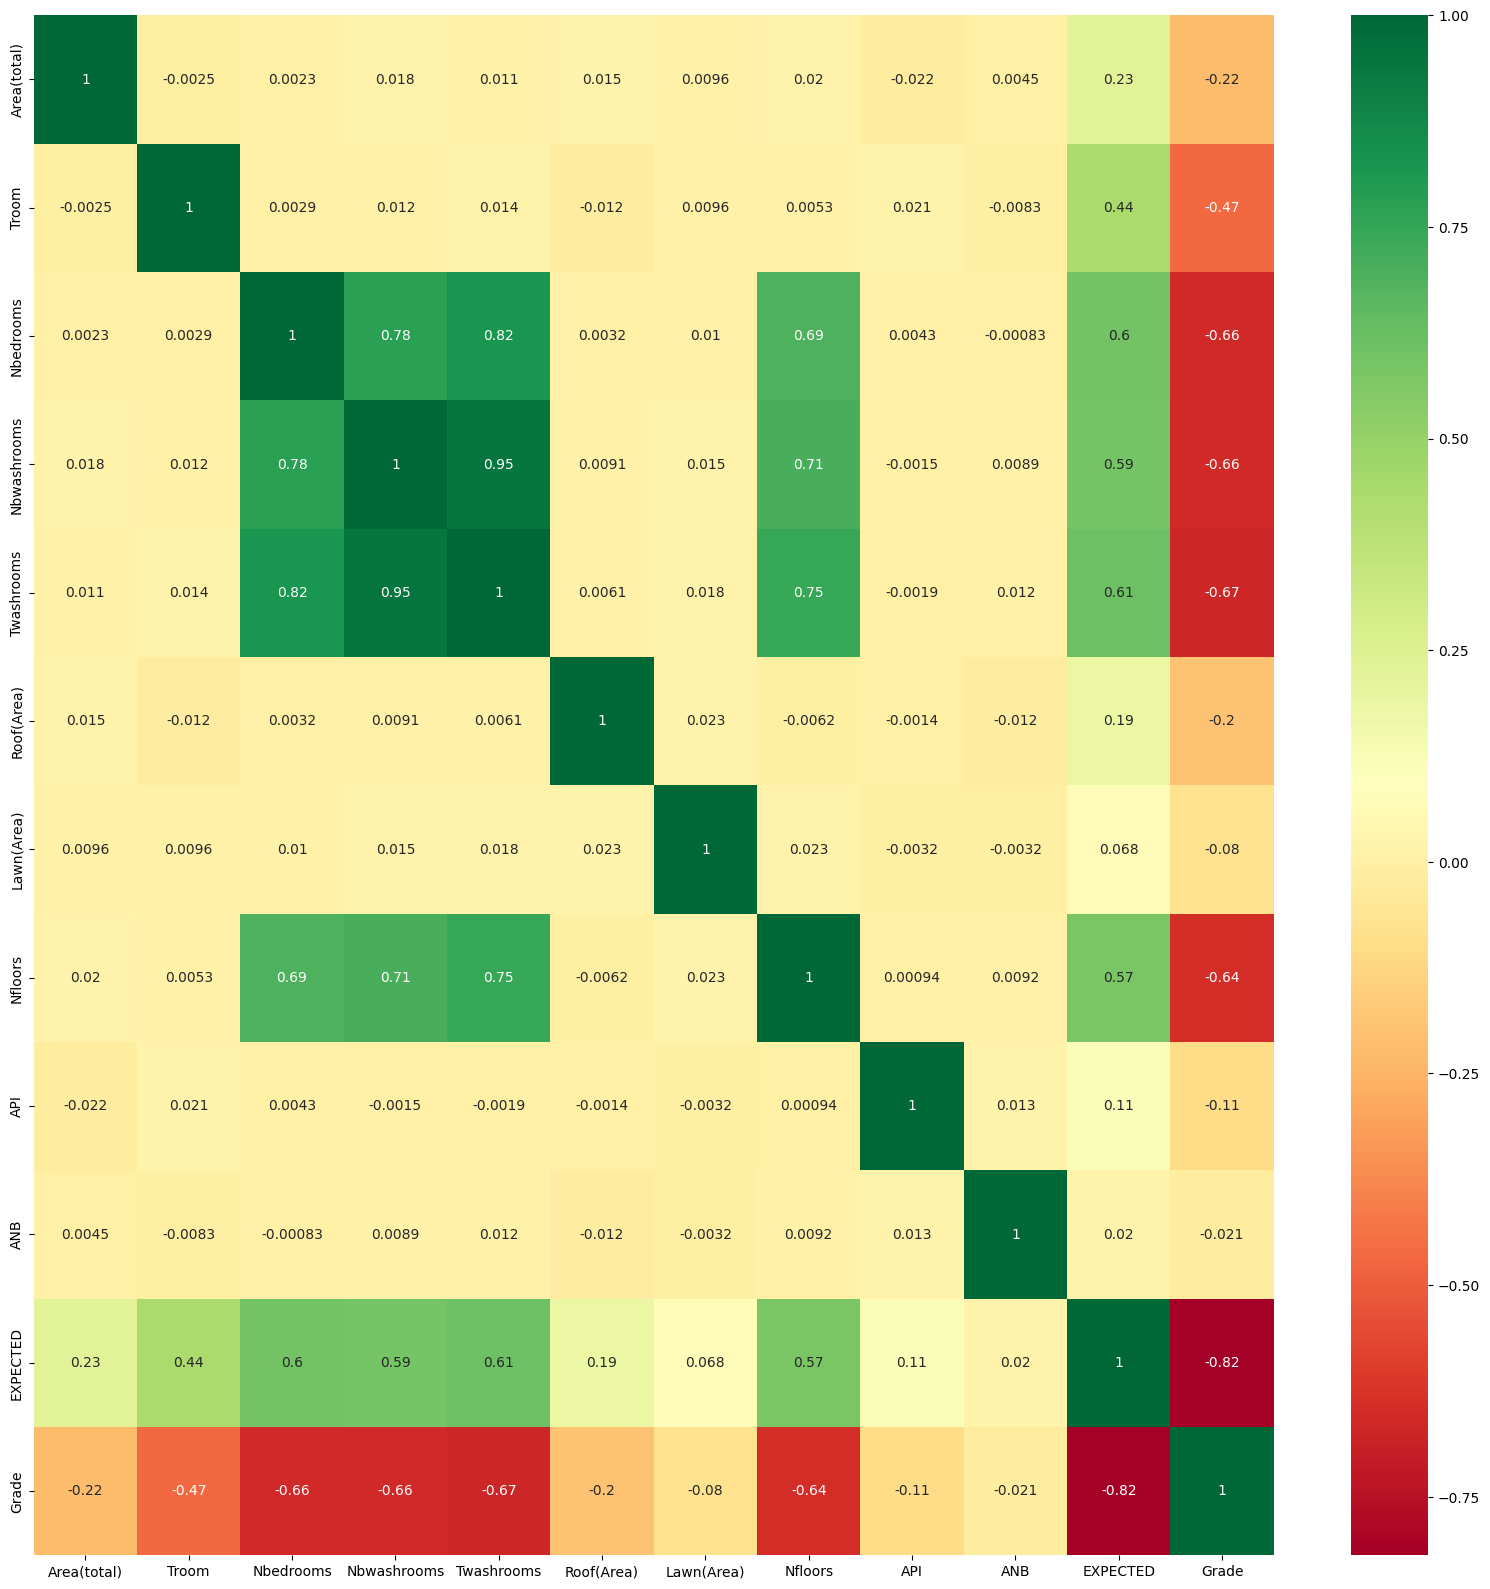

In [4663]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = house.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(house[top_corr_features].corr(),annot=True,cmap="RdYlGn")

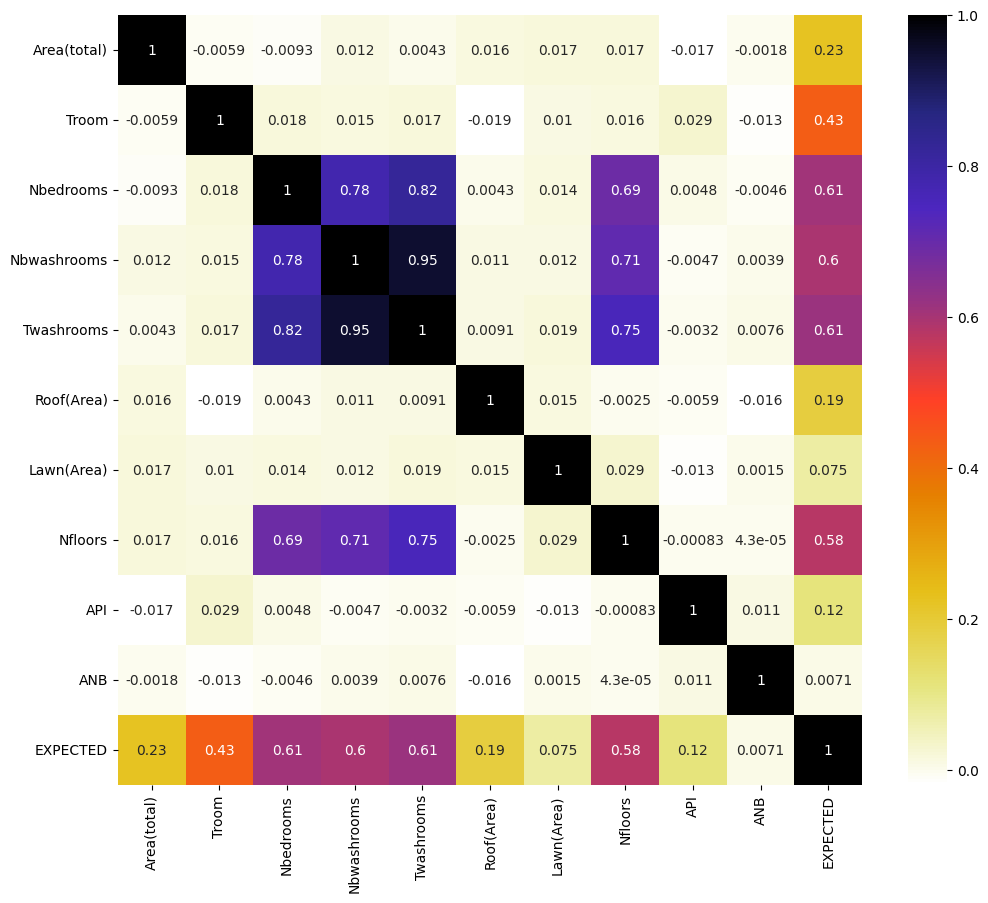

In [4664]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train_scaled.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [4665]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [4666]:
corr_features = correlation(house, 0.7)
len(set(corr_features))

3

In [4667]:
corr_features

{'Nbwashrooms', 'Nfloors', 'Twashrooms'}

In [4668]:
# x_train = x_train.drop(corr_features,axis=1)
# x_test = x_test.drop(corr_features,axis=1)

#Algorithms

Random Forest - 1

In [4669]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100,
                                       max_depth=10,
                                       max_features='sqrt',
                                       criterion='gini',
                                       random_state = 28)

# Train the classifier on the training data
rf_classifier.fit(x_train, y_train)

# Make predictions on the test data
Y_pred = rf_classifier.predict(x_test)

# Calculate the accuracy of the model

print("x_train,y_train",rf_classifier.score(x_train,y_train))
print("accuracy score",accuracy_score(y_test, Y_pred))     #0.90 on droping the twashroom roof

x_train,y_train 0.9695970695970696
accuracy score 0.8883116883116883


XG_Boost - 2

In [4670]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(learning_rate = 0.3,
                                   max_depth =  3,
                                   n_estimators = 200,  random_state=10)

# Train the classifier on the training data
xgb_classifier.fit(x_train, y_train)

# Make predictions on the test data
Y_pred = xgb_classifier.predict(x_test)

print("x_train,y_train",xgb_classifier.score(x_train,y_train))
print("accuracy score",accuracy_score(y_test, Y_pred))
            # 0.92 on droping the roof

x_train,y_train 0.9978021978021978
accuracy score 0.9415584415584416


In [4671]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cfm = confusion_matrix(y_test, Y_pred)
print("Confusion Matrix :")
print(cfm)

classification_rep = classification_report(y_test, Y_pred)
print("Classification Report :")                #97 with 95 and 0.25 spilit
print(classification_rep)                         #0.9506493506493506 45 and 93

print("Accuracy of the SVC model:", accuracy_score)                                                     #0.9677655677655678 0 and 93
accuracy_score = accuracy_score(y_test, Y_pred)   #0.9674285714285714 #0.96 because of 0 and 90 , and 0.30 split

Confusion Matrix :
[[ 77  17   0   0   0]
 [  9 295  21   0   0]
 [  0  17 649  12   0]
 [  0   0  11 426   0]
 [  0   0   0   3   3]]
Classification Report :
              precision    recall  f1-score   support

         0.0       0.90      0.82      0.86        94
         1.0       0.90      0.91      0.90       325
         2.0       0.95      0.96      0.96       678
         3.0       0.97      0.97      0.97       437
         4.0       1.00      0.50      0.67         6

    accuracy                           0.94      1540
   macro avg       0.94      0.83      0.87      1540
weighted avg       0.94      0.94      0.94      1540

Accuracy of the SVC model: <function accuracy_score at 0x7e82bae87880>


Support Vector Classification Model - 3

In [4672]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc = SVC(C = 128,          #C = 128  / 0.961224489
          gamma = 0.02,     #replace = 77,83,84,88,91,92 / 0.9673469387755103
          kernel = "rbf",
          random_state = 17)
svc.fit(x_train, y_train)          #0.972108843537415
Y_pred = svc.predict(x_test)        #0.9727272727272728 split - 22
                                     #0.974025974025974
print("x_train,y_train",svc.score(x_train,y_train))
print("accuracy score",accuracy_score(y_test, Y_pred)) #random_state = 11,18,26,45 - 0.953741496

x_train,y_train 0.987912087912088
accuracy score 0.9753246753246754


In [4673]:
cfm = confusion_matrix(y_test, Y_pred)
print("Confusion Matrix for SVC:")
print(cfm)

classification_rep = classification_report(y_test, Y_pred)
print("Classification Report for SVC:")                #97 with 95 and 0.25 spilit
print(classification_rep)                         #0.9506493506493506 45 and 93
                                                     #0.9677655677655678 0 and 93
accuracy_score = accuracy_score(y_test, Y_pred)   #0.9674285714285714
print("Accuracy of the SVC model:", accuracy_score) #0.96 because of 0 and 90 , and 0.30 split

Confusion Matrix for SVC:
[[ 90   4   0   0   0]
 [  4 308  13   0   0]
 [  0   3 665  10   0]
 [  0   0   3 433   1]
 [  0   0   0   0   6]]
Classification Report for SVC:
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96        94
         1.0       0.98      0.95      0.96       325
         2.0       0.98      0.98      0.98       678
         3.0       0.98      0.99      0.98       437
         4.0       0.86      1.00      0.92         6

    accuracy                           0.98      1540
   macro avg       0.95      0.98      0.96      1540
weighted avg       0.98      0.98      0.98      1540

Accuracy of the SVC model: 0.9753246753246754


Decision Tree - 4

In [4674]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# Create a Decision Tree classifier with the best hyperparameters
dt_classifier = DecisionTreeClassifier(max_depth = 10,
                                            min_samples_leaf = 3,
                                            min_samples_split = 5,random_state = 10)

# Train the model on the entire training dataset
dt_classifier.fit(x_train, y_train)
Y_pred = dt_classifier.predict(x_test)

print("x_train,y_train",dt_classifier.score(x_train,y_train))
print("accuracy score",accuracy_score(y_test,Y_pred))

x_train,y_train 0.921978021978022
accuracy score 0.8292207792207792


In [4675]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(y_test,Y_pred))

acc=accuracy_score(y_test, Y_pred)
print("Accuracy of the modle: ",acc)   #0.81 on droping the roof

[[ 66  28   0   0   0]
 [ 26 241  58   0   0]
 [  0  42 585  51   0]
 [  0   0  52 383   2]
 [  0   0   0   4   2]]
Classification report: 
              precision    recall  f1-score   support

         0.0       0.72      0.70      0.71        94
         1.0       0.77      0.74      0.76       325
         2.0       0.84      0.86      0.85       678
         3.0       0.87      0.88      0.88       437
         4.0       0.50      0.33      0.40         6

    accuracy                           0.83      1540
   macro avg       0.74      0.70      0.72      1540
weighted avg       0.83      0.83      0.83      1540

Accuracy of the modle:  0.8292207792207792


In [4676]:
# # Get the best parameters
# """best_params = grid_search.best_params_"""

# # Print the best parameters
# print("Best Parameters:")
# for param, value in best_params.items():
#     print(f"{param}: {value}")

#More Ananlysis

In [4677]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)

ExtraTreesClassifier()

In [4678]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.08212228 0.19081686 0.09698031 0.06840897 0.0859406  0.06395403
 0.04291484 0.10170435 0.04861712 0.03417172 0.18436892]


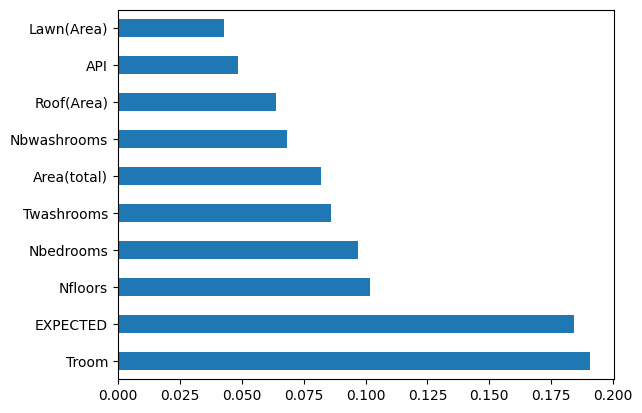

In [4679]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index= x_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [4680]:
corr_features

{'Nbwashrooms', 'Nfloors', 'Twashrooms'}

#Test Data Set

In [4681]:
test.head()

,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,EXPECTED
id,,,,,,,,,,,,
1,348,9.0,5.0,3.0,5,NaN,NaN,84.0,5,91.0,6,4422$
2,311,6.0,5.0,5.0,6,NO,0.0,86.0,6,83.0,4,3432$
3,342,5.0,6.0,6.0,7,yes,120.0,85.0,4,95.0,5,4066$
4,329,7.0,7.0,4.0,6,NaN,NaN,105.0,5,97.0,6,4322$
5,307,6.0,2.0,3.0,4,no,0.0,76.0,2,64.0,4,3031$


In [4682]:
test.shape

(3299, 12)

In [4683]:
test["Roof(Area)"].fillna(100, inplace = True)

In [4684]:
test["Roof(Area)"].replace(100,93.20276252877634,inplace = True)

In [4685]:
test["Roof(Area)"].value_counts()

0.000000      1340
93.202763      677
84.000000       44
105.000000      40
113.000000      35
96.000000       34
88.000000       34
117.000000      33
116.000000      33
112.000000      32
80.000000       32
118.000000      30
90.000000       30
75.000000       30
86.000000       29
120.000000      29
103.000000      29
95.000000       29
91.000000       28
98.000000       28
97.000000       28
93.000000       27
114.000000      27
102.000000      27
94.000000       26
92.000000       25
79.000000       25
82.000000       25
78.000000       25
115.000000      25
77.000000       24
72.000000       24
81.000000       24
87.000000       24
85.000000       23
73.000000       23
74.000000       22
76.000000       22
107.000000      22
108.000000      21
119.000000      21
83.000000       21
71.000000       21
109.000000      21
99.000000       20
111.000000      20
101.000000      19
106.000000      18
104.000000      18
110.000000      18
89.000000       17
Name: Roof(Area), dtype: int64

In [4686]:
test.columns

Index(['Area(total)', 'Troom', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms',
       'roof', 'Roof(Area)', 'Lawn(Area)', 'Nfloors', 'API', 'ANB',
       'EXPECTED'],
      dtype='object')

In [4687]:
test.drop(columns=['roof'],axis= 1, inplace=True)

In [4688]:
test.isnull().sum()

Area(total)    0
Troom          1
Nbedrooms      1
Nbwashrooms    1
Twashrooms     0
Roof(Area)     0
Lawn(Area)     1
Nfloors        0
API            1
ANB            0
EXPECTED       0
dtype: int64

In [4689]:
for x in test.columns:
    if test[x].dtype=="object" or test[x].dtype=="bool":
        test[x].fillna(test[x].mode()[0], inplace=True)
    elif test[x].dtype=="int64" or test[x].dtype=="float64":
        test[x].fillna(round(test[x].mean()), inplace=True)

In [4690]:
test.isnull().sum()

Area(total)    0
Troom          0
Nbedrooms      0
Nbwashrooms    0
Twashrooms     0
Roof(Area)     0
Lawn(Area)     0
Nfloors        0
API            0
ANB            0
EXPECTED       0
dtype: int64

In [4691]:
test.shape

(3299, 11)

In [4692]:
col=[]
for x in test.columns:
  if test[x].dtypes == "object":
    col.append(x)
col

['EXPECTED']

In [4693]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in col:
    test[x]=le.fit_transform(test[x])

In [4694]:
test.head()

,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,EXPECTED
id,,,,,,,,,,,
1,348,9.0,5.0,3.0,5,93.202763,84.0,5,91.0,6,1111
2,311,6.0,5.0,5.0,6,0.000000,86.0,6,83.0,4,237
3,342,5.0,6.0,6.0,7,120.000000,85.0,4,95.0,5,796
4,329,7.0,7.0,4.0,6,93.202763,105.0,5,97.0,6,1023
5,307,6.0,2.0,3.0,4,0.000000,76.0,2,64.0,4,27


In [4695]:
test = scaler.transform(test)

In [4696]:
# test

#test Model



In [4697]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc = SVC(C = 128,          #C = 128  / 0.961224489
          gamma = 0.02,     #replace = 77,83,84,88,91,92 / 0.9673469387755103
          kernel = "rbf",
          random_state = 17)
svc.fit(x_train, y_train)          #0.972108843537415
New_pred = svc.predict(test)

In [4698]:
print("x_train,y_train",svc.score(x_train,y_train)) #0.9875226039783002
#0.987912087912088

x_train,y_train 0.987912087912088


In [4699]:
# from sklearn.svm import SVC
# from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# svc = SVC()
# svc.fit(x_train, y_train)
# New_pred = svc.predict(test)
# print("x_train,y_train",svc.score(x_train,y_train))  #0.964376130198915

In [4700]:
New_pred

array([1., 3., 2., ..., 2., 3., 3.])

In [4701]:
check_test=pd.read_csv(r"/content/drive/MyDrive/hackothon/house_pred/Data Set/TEST_.csv")

check_test["Grade"]= New_pred
check_test["Grade"]= check_test["Grade"].replace({ 0:'A', 1:'B', 2:'C', 3:'D', 4:'E'})
check_test

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,EXPECTED,Grade
0,1,348,9.0,5.0,3.0,5,NaN,NaN,84.0,5,91.0,6,4422$,B
1,2,311,6.0,5.0,5.0,6,NO,0.0,86.0,6,83.0,4,3432$,D
2,3,342,5.0,6.0,6.0,7,yes,120.0,85.0,4,95.0,5,4066$,C
3,4,329,7.0,7.0,4.0,6,NaN,NaN,105.0,5,97.0,6,4322$,B
4,5,307,6.0,2.0,3.0,4,no,0.0,76.0,2,64.0,4,3031$,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3294,3295,349,7.0,3.0,3.0,4,NaN,NaN,100.0,5,89.0,4,3858$,C
3295,3296,338,7.0,3.0,2.0,4,NO,0.0,87.0,3,75.0,6,3714$,D
3296,3297,307,8.0,4.0,5.0,6,yes,88.0,88.0,4,83.0,6,3824$,C
3297,3298,352,5.0,3.0,4.0,5,YES,88.0,100.0,2,99.0,4,3533$,D


In [4702]:
check_test.Grade.value_counts()

C    1395
D    1038
B     674
A     177
E      15
Name: Grade, dtype: int64

In [4703]:
result = check_test.iloc[:, [0, -1]]

In [4704]:
result

,id,Grade
0,1,B
1,2,D
2,3,C
3,4,B
4,5,D
...,...,...
3294,3295,C
3295,3296,D
3296,3297,C
3297,3298,D


In [4705]:
result.isnull().sum()

id       0
Grade    0
dtype: int64

In [4706]:
result.to_csv('myproject23.csv',index=False)

In [4707]:
result.to_csv('/content/drive/MyDrive/myproject23.csv', index=False)
